In [46]:
rm(list = ls())
setwd(rprojroot::find_rstudio_root_file())

In [16]:
### Forecasts
# input data

run_model <- function(datetime_initialisation,forecast_mode,export,...) {
    source("base/Preprocess_data.R")
    source("base/Regression_model.R")
    source("base/Knn_model.R")
    source("base/Export_data.R")
    source("base/Scores.R")
  #catchment_code <- "5410002"
  #datetime_initialisation = lubridate::make_date(2016,6,1)
  #horizon = horizon_mode(window_method = "dynamic", month_start = 9, month_end = 3)
  #predictor_list <- c("tem_mean_6months")
  #remove_wys <- c(1990,1940,2013)
  #water_units = waterunits(q = "m^3/s", y = "GL")
  #forecast_mode <- "both"
  #data_location_paths = get_default_datasets_path(meteo = "ens30avg", hydro = "ERA5Ens_SKGE")

    #pre-processed data
    data_input = preprocess_data(
        datetime_initialisation,
        forecast_mode,...)
    # ensemble volume forecast
    data_fore = forecast_vol_ensemble(
      data_input = data_input,
      forecast_mode = forecast_mode)
    # # ensemble flow forecast
    #q_fore = run_q_forecast(
    #  data_input = data_input,
    #  data_fore = data_fore,
    #  forecast_mode = forecast_mode)
    #export results
    output = export_data(
      data_input = data_input,
      data_fore = data_fore,
      export = export)
  
  return(output)
  
}

In [17]:
#all available catchments
catchments_attributes_filename = "data_input/attributes/attributes_49catchments_ChileCentral.csv" 
cod_cuencas = read.csv(catchments_attributes_filename)$cod_cuenca
cod_cuencas

[1] 3414001 3421001 3430003 3820001 4302001 4311001 4313001 4320001 4501001
[10] 4503001 4511002 4513001 4515002 4522002 4531002 4703002 5100001 5101001
[19] 5200001 5401003 5410002 5411001 5414001 5707002 5710001 5721001 5722001
[28] 5722002 5730008 5741001 6003001 6008005 6013001 6027001 6028001 7103001
[37] 7104002 7112001 7115001 7317005 7321002 7330001 7350003 7354002 7355002
[46] 7358001 7381001 8104001 8106001

In [18]:
#months of initialisation
months_initialisation = seq(4,9)
months_initialisation

[1] 4 5 6 7 8 9

In [45]:
# explore variables
variable = c("SOI", "BIENSO")
agg_months = seq(1,12,1)
agg_func = "mean"

grid = expand.grid(variable, agg_months)
predictors = paste(grid[,1], agg_func, paste0(grid[,2],"months"), sep = "_")
climate_predictors = predictors


[1] "SOI_mean_1months"     "BIENSO_mean_1months"  "SOI_mean_2months"    
 [4] "BIENSO_mean_2months"  "SOI_mean_3months"     "BIENSO_mean_3months" 
 [7] "SOI_mean_4months"     "BIENSO_mean_4months"  "SOI_mean_5months"    
[10] "BIENSO_mean_5months"  "SOI_mean_6months"     "BIENSO_mean_6months" 
[13] "SOI_mean_7months"     "BIENSO_mean_7months"  "SOI_mean_8months"    
[16] "BIENSO_mean_8months"  "SOI_mean_9months"     "BIENSO_mean_9months" 
[19] "SOI_mean_10months"    "BIENSO_mean_10months" "SOI_mean_11months"   
[22] "BIENSO_mean_11months" "SOI_mean_12months"    "BIENSO_mean_12months"

In [21]:
#run sample for only one case. Testing the run_model function
run_model(     
    catchment_code = sample(cod_cuencas,1),
    datetime_initialisation = lubridate::make_date(2016,sample(months_initialisation,1),1),
    horizon = horizon_mode(window_method = "static", month_start = 9, month_end = 3),
    predictor_list = sample(climate_predictors,1),
    remove_wys = seq(1950,1979),
    water_units = waterunits(q = "m^3/s", y = "GL"),
    forecast_mode = "cv",
    data_location_paths = get_default_datasets_path(meteo = "NULL", hydro = "NULL"),
    export = 'scores')

rmse_det,r2_det,mae_obs,crps_ens,crpss_climatology
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
35.42171,0.05216173,22.46947,18.59263,0.1725382


In [22]:
library(foreach)
#library(doParallel)
#registerDoParallel(cores = parallel::detectCores())
library(doSNOW)
library(dplyr)
cl <- makeCluster(4)
registerDoSNOW(cl)

list_lengths <- function(...){
  list_lengths <- lapply(list(...), length)
  total_iter <- prod(unlist(list_lengths))
  return(total_iter)
}

p1 = months_initialisation #sample(months_initialisation,2)
p2 = climate_predictors # sample(climate_predictors,2)
p3 = cod_cuencas#sample(cod_cuencas,2)


  

Loading required package: iterators

Loading required package: snow



In [23]:
max_iter = list_lengths(p1,p2,p3)
pb <- txtProgressBar(max = max_iter, style = 3)
opts = list(progress = function(n) setTxtProgressBar(pb, n))
          
model <-
  foreach(month_initialisation= p1,.combine = "c") %:%
  foreach(climate_predictor = p2,.combine = "c") %:%
  foreach(catchment_code=p3,.options.snow=opts) %dopar% {    
      
    run_model(     
    catchment_code = catchment_code,
    datetime_initialisation = lubridate::make_date(2022,month_initialisation,1),
    horizon = horizon_mode(window_method = "static", month_start = 9, month_end = 3),
    predictor_list = climate_predictor,
    remove_wys = c(1950,1979),
    water_units = waterunits(q = "m^3/s", y = "GL"),
    forecast_mode = "cv",
    data_location_paths = get_default_datasets_path(meteo = NULL, hydro = NULL),
    export = 'scores')
      
  }
model = purrr::transpose(model)

close(pb)
stopCluster(cl)
#stopImplicitCluster()


  |======================================================================| 100%


In [31]:
rbindlist(model$info) %>% head

ERROR: Error in rbindlist(model$info): object 'model' not found


In [26]:
rbindlist(model$scores)  %>% head

rmse_det,r2_det,mae_obs,crps_ens,crpss_climatology
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22.792206,0.0557096307,17.443319,12.556056,0.2801796
13.458433,0.0259383336,6.979387,6.361039,0.0885962
24.406067,0.0497394444,19.328404,13.601641,0.2962874
169.200352,0.0102609399,98.546479,84.346589,0.1440933
6.838109,0.0192020581,4.390249,3.569173,0.1870226
36.313818,0.0008622603,21.593582,19.225825,0.1096509


In [29]:
# stopImplicitCluster()
df <- cbind(rbindlist(model$info),rbindlist(model$scores))
# modify names
df <- dplyr::rename(df,'predictor_name' = 'predictor_list_corrected')

# order columns
#df$month_initialisation <- factor(df$month_initialisation,levels = months_initialisation)
df$month_initialisation <- factor( lubridate::month(df$datetime_initialisation,label = T))
df$predictor_name <- factor(df$predictor_name)
df$catchment_code <- as.numeric(df$catchment_code)

saveRDS(df,paste0("data_output/scores/RDS/model_results_",today(),".RDS"))

df %>% head


catchment_code,datetime_initialisation,predictor_list,horizon,data_location_paths,water_units,forecast_mode,remove_wys,predictor_name,rmse_det,r2_det,mae_obs,crps_ens,crpss_climatology,month_initialisation
<dbl>,<date>,<chr>,<list>,<list>,<list>,<chr>,<list>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>
3414001,2022-04-01,SOI_mean_1months,"static, 9, 3",data_inp....,"m^3/s, GL",cv,"1950, 1979",SOI_mean_1months,22.792206,0.0557096307,17.443319,12.556056,0.2801796,Apr
3421001,2022-04-01,SOI_mean_1months,"static, 9, 3",data_inp....,"m^3/s, GL",cv,"1950, 1979",SOI_mean_1months,13.458433,0.0259383336,6.979387,6.361039,0.0885962,Apr
3430003,2022-04-01,SOI_mean_1months,"static, 9, 3",data_inp....,"m^3/s, GL",cv,"1950, 1979",SOI_mean_1months,24.406067,0.0497394444,19.328404,13.601641,0.2962874,Apr
3820001,2022-04-01,SOI_mean_1months,"static, 9, 3",data_inp....,"m^3/s, GL",cv,"1950, 1979",SOI_mean_1months,169.200352,0.0102609399,98.546479,84.346589,0.1440933,Apr
4302001,2022-04-01,SOI_mean_1months,"static, 9, 3",data_inp....,"m^3/s, GL",cv,"1950, 1979",SOI_mean_1months,6.838109,0.0192020581,4.390249,3.569173,0.1870226,Apr
4311001,2022-04-01,SOI_mean_1months,"static, 9, 3",data_inp....,"m^3/s, GL",cv,"1950, 1979",SOI_mean_1months,36.313818,0.0008622603,21.593582,19.225825,0.1096509,Apr


In [41]:
rm(list = ls())
setwd(rprojroot::find_rstudio_root_file())
source("base/Charts.R")

CRPSS_plot = list(
    filename_input  = "data_output/scores/RDS/model_results_2023-03-13.RDS",
  metric_variable = "crpss_climatology",
  filename_export = "CRPSS_vol_climate_indices_pheatmap",
  legend_title = "CRPSS (climatología)",
  plot_absolute = F
)

plot = do.call(plot_pheatmap_EDA,CRPSS_plot)

Warning message:
“You defined `cell_fun` for a heatmap with more than 100 rows or
columns, which might be very slow to draw. Consider to use the
vectorized version `layer_fun`.”


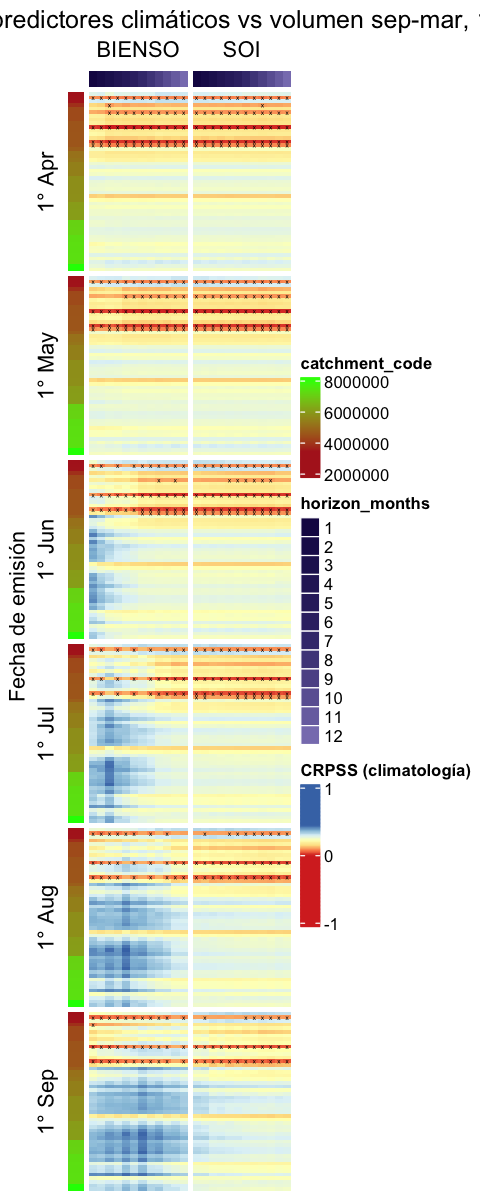

In [44]:
options(repr.plot.width = 4, repr.plot.height = 10,repr.plot.res = 120)
plot$plot1